#Assignment 1:

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
#import sys
#import urllib2

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('C:/Users/Boyeong/Dropbox/NYU_CUSP/2015_Fall_Principle of Urban Informatics/citibikedata/201503-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


#1) By Gender

In [3]:
# Splitting data by gender 
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

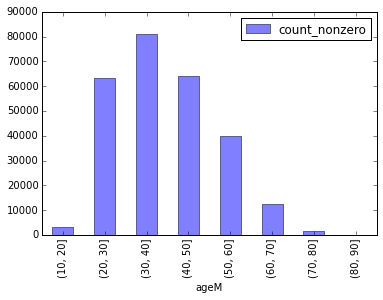

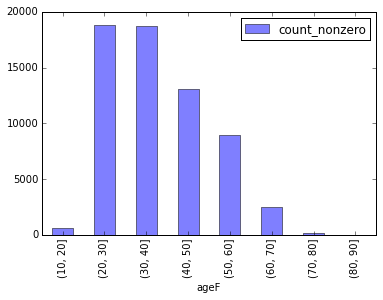

In [4]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', alpha=0.5)
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar', alpha=0.5)

          count_nonzero
ageM                   
(10, 20]       0.001015
(20, 30]       0.059586
(30, 40]       0.051493
(40, 50]       0.018414
(50, 60]       0.010115
(60, 70]       0.003298
(70, 80]       0.000148
(80, 90]       0.000000


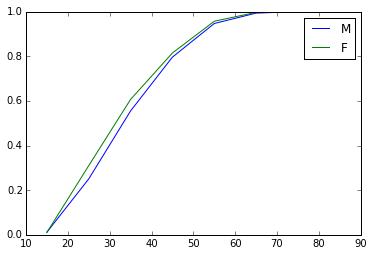

In [5]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [6]:
import scipy.stats

## Kolmogorov-Smirnoff test to compare 2 models

In [7]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.59329892986490207, 0.0)


###Result
* From the table of critical values, c(α) at significant level α=0.05 is 1.36 which is higher than ks test value.
* Consequently, Null hypothesis is not rejected.
* It means the samples come from the same parent distribution. 

##Pearson's test for correlation

In [41]:
pearson_citibike = scipy.stats.pearsonr(df.ageM,df.ageF)
print pearson_citibike

(nan, 1.0)


In [44]:
# Need data revision (removing NaN value)
# print df.ageF.head(15)
print df.ageF.count()
print df.ageM.count()

# As sample size of each group is different, I will make those same size (random 63042 sample from Male data)

63042
265847


In [9]:
import numpy.ma as ma

In [10]:
# Trying to use masked function (but I used another method after this part)
ageM=df.ageM
ageF=df.ageF
ageM_true=ma.masked_invalid (ageM)
ageF_true=ma.masked_invalid (ageF)
print ageM_true[:10]
print ageF_true[:10]


[28.0 47.0 -- 32.0 45.0 32.0 49.0 -- -- 51.0]
[-- -- -- -- -- -- -- 64.0 22.0 --]


In [46]:
# Removing NaN data
df_revisedM = pd.DataFrame(columns=['M'])
df_revisedM['M']=ageM
df_revisedM=df_revisedM[np.isfinite(df_revisedM['M'])]
print df_revisedM.head()

df_revisedF = pd.DataFrame(columns=['F'])
df_revisedF['F']=ageF
df_revisedF=df_revisedF[np.isfinite(df_revisedF['F'])]
print df_revisedF.head()

#result = df_revisedM.join(df_revisedF, how='')
#print len(result)
#print result[:20]

#df_result = result[np.isfinite(result['F'])]
#print df_result[:20]
#df_result2 = df_result[np.isfinite(df_result['F'])]
#print df_result2[:10]

    M
0  28
1  47
3  32
4  45
5  32
     F
7   64
8   22
14  33
21  50
26  26


In [47]:
# Make random 63042 samples from Male data
df_revisedM_random=df_revisedM.sample(63042)

# Calculation Pearson correlation
pearson_citibike2= scipy.stats.pearsonr(df_revisedM_random.M, df_revisedF.F)
print pearson_citibike2

(-0.0069655107140832737, 0.080308560927141087)


###Result
* Pearson's correlation coefficient = -0.0069655...
* 2-tailed p-value = 0.09030...
* It means Male sample and Female sample have very low negative correlation. But this Person correlation coefficient is not statistically significant, because p-value is higher than 0.05.

##Spearman's test for correlation

In [42]:
spearman_citibike = scipy.stats.spearmanr(df.ageM, df.ageF)
print spearman_citibike

(-0.43933291820794645, 0.0)


###Result
* Spearman's correlation coeffceint = -0.43933...
* 2-tailed p-value = 0.0
* It means Male and Female sample have medium negative correlation at the statistically significant level.

#2) by Daytime and Nighttime

In [49]:
#df.head()

In [50]:
df['date'] = pd.to_datetime(df['starttime'])
#note that with dataframes i can refer to variables as dictionary keys, i.e. df['starttime'] or as attributes: df.starttime. 
#df['hour'] = df['mystarttime'].dt.hour

In [54]:
def hr_func(ts):
    return ts.hour

df['hour'] = df['date'].apply(hr_func)

In [56]:
print df.head(2)

   tripduration      starttime       stoptime  start station id  \
0           669  3/1/2015 0:00  3/1/2015 0:11               164   
1           750  3/1/2015 0:01  3/1/2015 0:14               258   

            start station name  start station latitude  \
0              E 47 St & 2 Ave               40.753231   
1  DeKalb Ave & Vanderbilt Ave               40.689407   

   start station longitude  end station id          end station name  \
0               -73.970325             477           W 41 St & 8 Ave   
1               -73.968855             436  Hancock St & Bedford Ave   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.756405             -73.990026   21409  Subscriber   
1             40.682166             -73.953990   19397  Subscriber   

   birth year  gender  ageM  ageF                date  hour  
0        1987       1    28   NaN 2015-03-01 00:00:00     0  
1        1968       1    47   NaN 2015-03-01 00:01:00     0  


In [57]:
# Makeing new column for distinction between Daytime and Nightime
df['DN'] = df.hour.apply(lambda x: 'D' if x>6 and x < 18 else 'N')

In [59]:
print df.head()

   tripduration      starttime       stoptime  start station id  \
0           669  3/1/2015 0:00  3/1/2015 0:11               164   
1           750  3/1/2015 0:01  3/1/2015 0:14               258   
2           663  3/1/2015 0:01  3/1/2015 0:12               497   
3           480  3/1/2015 0:02  3/1/2015 0:10               470   
4          1258  3/1/2015 0:02  3/1/2015 0:23               345   

            start station name  start station latitude  \
0              E 47 St & 2 Ave               40.753231   
1  DeKalb Ave & Vanderbilt Ave               40.689407   
2           E 17 St & Broadway               40.737050   
3              W 20 St & 8 Ave               40.743453   
4              W 13 St & 6 Ave               40.736494   

   start station longitude  end station id            end station name  \
0               -73.970325             477             W 41 St & 8 Ave   
1               -73.968855             436    Hancock St & Bedford Ave   
2               -73.990093

In [60]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['DN'] == 'D')]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['DN'] == 'N')]

In [62]:
print df.head()

   tripduration      starttime       stoptime  start station id  \
0           669  3/1/2015 0:00  3/1/2015 0:11               164   
1           750  3/1/2015 0:01  3/1/2015 0:14               258   
2           663  3/1/2015 0:01  3/1/2015 0:12               497   
3           480  3/1/2015 0:02  3/1/2015 0:10               470   
4          1258  3/1/2015 0:02  3/1/2015 0:23               345   

            start station name  start station latitude  \
0              E 47 St & 2 Ave               40.753231   
1  DeKalb Ave & Vanderbilt Ave               40.689407   
2           E 17 St & Broadway               40.737050   
3              W 20 St & 8 Ave               40.743453   
4              W 13 St & 6 Ave               40.736494   

   start station longitude  end station id            end station name  \
0               -73.970325             477             W 41 St & 8 Ave   
1               -73.968855             436    Hancock St & Bedford Ave   
2               -73.990093

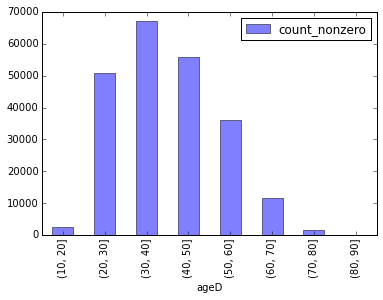

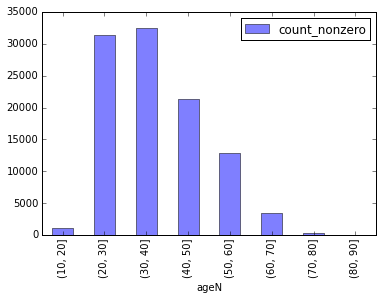

In [63]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar', alpha=0.5)
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar', alpha=0.5)

          count_nonzero
ageD                   
(10, 20]       0.000149
(20, 30]       0.077839
(30, 40]       0.094551
(40, 50]       0.054401
(50, 60]       0.020455
(60, 70]       0.002872
(70, 80]       0.000003
(80, 90]       0.000000


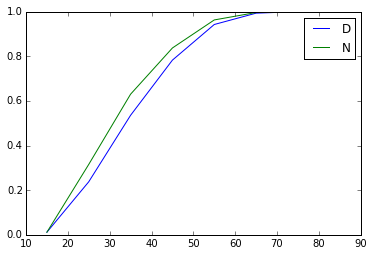

In [64]:
#print df.ageS, df.ageS.cumsum()

csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.legend()

##Kolmogorov-Smirnoff test to compare 2 models

In [65]:
ks_DN=scipy.stats.ks_2samp(df.ageD, df.ageN)
print ks_DN

(0.35912130733180042, 0.0)


###Result
* From the table of critical values, c(α) at significant level α=0.05 is 1.36 which is higher than ks test value.
* Consequently, Null hypothesis is not rejected.
* It means the samples come from the same parent distribution.

##Pearson's test for correlation

In [66]:
pearson_citibike_DN = scipy.stats.pearsonr(df.ageD,df.ageN)
print pearson_citibike_DN

(nan, 1.0)


In [67]:
# Need data revision (removing NaN value)
# print df.ageF.head(15)
print df.ageD.count()
print df.ageN.count()

# As sample size of each group is different, I will make those same size (random 103108 sample from Daytime data)

225865
103108


In [69]:
ageD=df.ageD
ageN=df.ageN

# Removing NaN data
df_revisedD = pd.DataFrame(columns=['D'])
df_revisedD['D']=ageD
df_revisedD=df_revisedD[np.isfinite(df_revisedD['D'])]
print df_revisedD.head()

df_revisedN = pd.DataFrame(columns=['N'])
df_revisedN['N']=ageN
df_revisedN=df_revisedN[np.isfinite(df_revisedN['N'])]
print df_revisedN.head()


      D
336  52
337  40
338  30
339  39
340  42
    N
0  28
1  47
3  32
4  45
5  32


In [70]:
# Make random 103108 samples from Daytime data
df_revisedD_random=df_revisedD.sample(103108)

# Calculation Pearson correlation
pearson_citibike_DN2= scipy.stats.pearsonr(df_revisedD_random.D, df_revisedN.N)
print pearson_citibike_DN2

(-0.00074726962831076166, 0.81037006617982399)


###Result
* Pearson's correlation coefficient = -0.0007472...
* 2-tailed p-value = 0.8103706...
* It means Daytime sample and Nightime sample have very low negative correlation. But this Person correlation coefficient is not statistically significant, because p-value is higher than 0.05.

##Spearman's test for correlation

In [71]:
spearman_citibike_DN = scipy.stats.spearmanr(df.ageD, df.ageN)
print spearman_citibike_DN

(-0.59220776388666707, 0.0)


###Result
* Spearman's correlation coeffceint = -0.5922...
* 2-tailed p-value = 0.0
* It means Daytime and Nightime sample have medium negative correlation at the statistically significant level.